In [74]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import csv
import math
import seaborn as sns


In [75]:
df = pd.read_csv("data/categorised_cancelled_flights_incomplete.csv")
df.head()

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ActualElapsedTime,CRSArrTime,CRSDepTime,CRSElapsedTime,CancellationCode,Distance,Diverted,FlightNum,TailNum,CarrierDelay,...,Origin,OriginAirportName,OriginState,Dest,DestAirportName,DestState,UniqueCarrier,CarrierName,Year,Date
0,NaN,835,740,115.0,NaN,627.0,0,681,NaN,NaN,...,CMH,John Glenn Columbus International,OH,MSP,Minneapolis-St Paul International,MN,NW,NaN,1987,1987-10-01
1,NaN,2115,2000,75.0,NaN,337.0,0,2128,NaN,NaN,...,SFO,San Francisco International,CA,LAX,Los Angeles International,CA,AA,American Airlines Inc.,1987,1987-10-01
2,NaN,1450,1340,70.0,NaN,325.0,0,715,NaN,NaN,...,BUR,Bob Hope,CA,OAK,Metropolitan Oakland International,CA,AS,Alaska Airlines Inc.,1987,1987-10-01
3,NaN,1440,1355,105.0,NaN,622.0,0,881,NaN,NaN,...,CLE,Cleveland-Hopkins International,OH,MEM,Memphis International,TN,NW,NaN,1987,1987-10-01
4,NaN,2359,2300,59.0,NaN,337.0,0,1436,NaN,NaN,...,SFO,San Francisco International,CA,LAX,Los Angeles International,CA,PS,NaN,1987,1987-10-01


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184011 entries, 0 to 184010
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ActualElapsedTime  0 non-null       float64
 1   CRSArrTime         184011 non-null  int64  
 2   CRSDepTime         184011 non-null  int64  
 3   CRSElapsedTime     182182 non-null  float64
 4   CancellationCode   58603 non-null   object 
 5   Distance           183849 non-null  float64
 6   Diverted           184011 non-null  int64  
 7   FlightNum          184011 non-null  int64  
 8   TailNum            139289 non-null  object 
 9   CarrierDelay       47644 non-null   float64
 10  LateAircraftDelay  47644 non-null   float64
 11  NASDelay           47644 non-null   float64
 12  WeatherDelay       47644 non-null   float64
 13  SecurityDelay      47644 non-null   float64
 14  Origin             184011 non-null  object 
 15  OriginAirportName  183600 non-null  object 
 16  Or

# 1. Exploring how many different carriers and airports in the U.S.

In [77]:
print(df['Dest'].nunique())
print(sorted(df['Dest'].unique()))

322
['ABE', 'ABI', 'ABQ', 'ABY', 'ACK', 'ACT', 'ACV', 'ACY', 'ADK', 'ADQ', 'AEX', 'AGS', 'AKN', 'ALB', 'ALO', 'AMA', 'ANC', 'ANI', 'APF', 'ASE', 'ATL', 'ATW', 'AUS', 'AVL', 'AVP', 'AZO', 'BDL', 'BET', 'BFL', 'BGM', 'BGR', 'BHM', 'BIL', 'BIS', 'BLI', 'BMI', 'BNA', 'BOI', 'BOS', 'BPT', 'BQK', 'BQN', 'BRO', 'BRW', 'BTM', 'BTR', 'BTV', 'BUF', 'BUR', 'BWI', 'BZN', 'CAE', 'CAK', 'CCR', 'CDC', 'CDV', 'CEC', 'CHA', 'CHO', 'CHS', 'CIC', 'CID', 'CLD', 'CLE', 'CLL', 'CLT', 'CMH', 'CMI', 'CMX', 'COD', 'COS', 'CPR', 'CRP', 'CRW', 'CSG', 'CVG', 'CWA', 'DAB', 'DAL', 'DAY', 'DBQ', 'DCA', 'DEN', 'DET', 'DFW', 'DHN', 'DLG', 'DLH', 'DRO', 'DSM', 'DTW', 'DUT', 'EAU', 'EFD', 'EGE', 'EKO', 'ELM', 'ELP', 'ERI', 'EUG', 'EVV', 'EWR', 'EYW', 'FAI', 'FAR', 'FAT', 'FAY', 'FCA', 'FLG', 'FLL', 'FLO', 'FNT', 'FSD', 'FSM', 'FWA', 'GCC', 'GCN', 'GEG', 'GFK', 'GGG', 'GJT', 'GNV', 'GPT', 'GRB', 'GRK', 'GRR', 'GSO', 'GSP', 'GST', 'GTF', 'GTR', 'GUC', 'GUM', 'HDN', 'HHH', 'HLN', 'HNL', 'HOU', 'HPN', 'HRL', 'HSV', 'HTS', '

In [78]:
print(df['UniqueCarrier'].nunique())
print(sorted(df['UniqueCarrier'].unique()))

29
['9E', 'AA', 'AQ', 'AS', 'B6', 'CO', 'DH', 'DL', 'EA', 'EV', 'F9', 'FL', 'HA', 'HP', 'ML (1)', 'MQ', 'NW', 'OH', 'OO', 'PA (1)', 'PI', 'PS', 'TW', 'TZ', 'UA', 'US', 'WN', 'XE', 'YV']


# 2. Exploring the number of Cancelled Flights across Airlines over the years

We will be exploring:
<br>1. Number of cancelled flights across the years (line graph, heat map)
<br>2. Number of cancelled flights across 2001 (line graph, heat map)

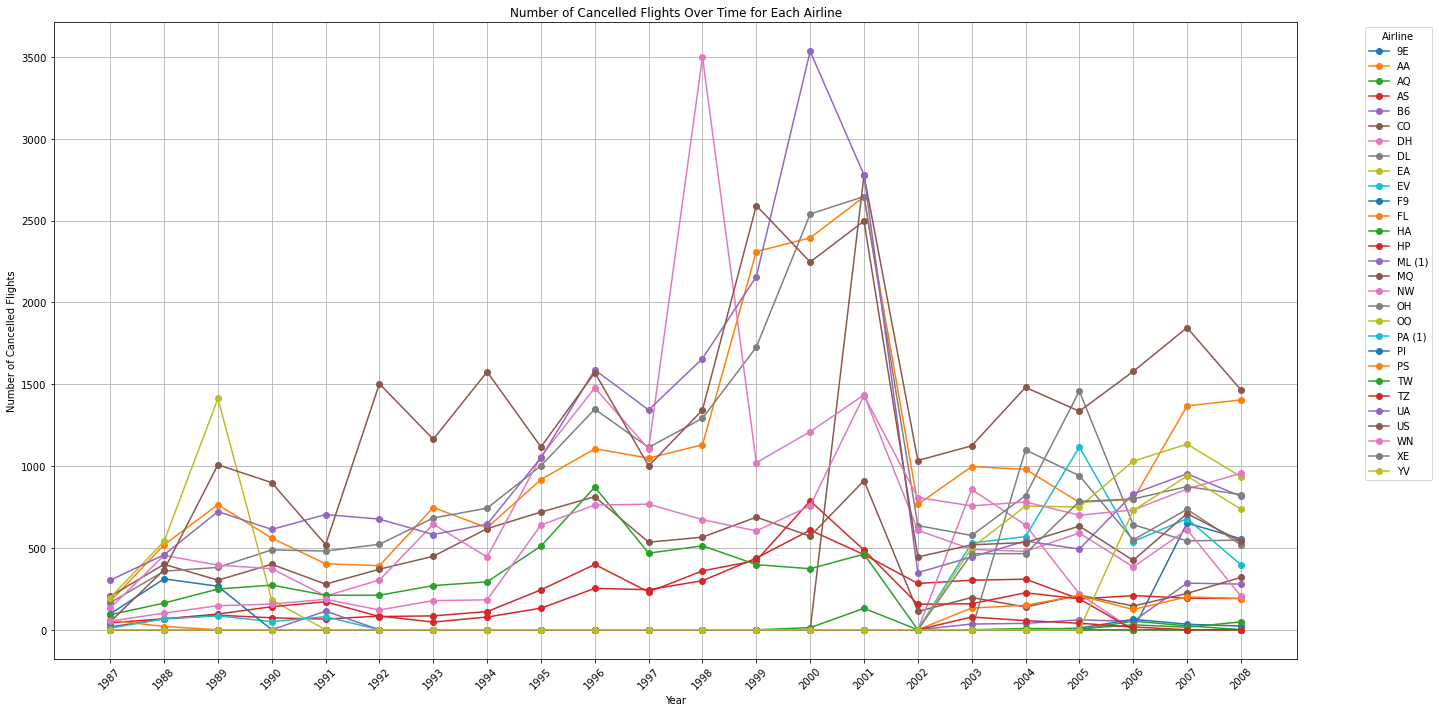

In [79]:
cancelled_flights_count = df.groupby(['Year', 'UniqueCarrier']).size().unstack(fill_value=0)

# Step 3: Plot the data
cancelled_flights_count.plot(kind='line', marker='o', figsize=(20, 10))
plt.title('Number of Cancelled Flights Over Time for Each Airline')
plt.xlabel('Year')
plt.ylabel('Number of Cancelled Flights')
plt.xticks(ticks=unique_years, labels=df['Year'].unique(), rotation=45) 
plt.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


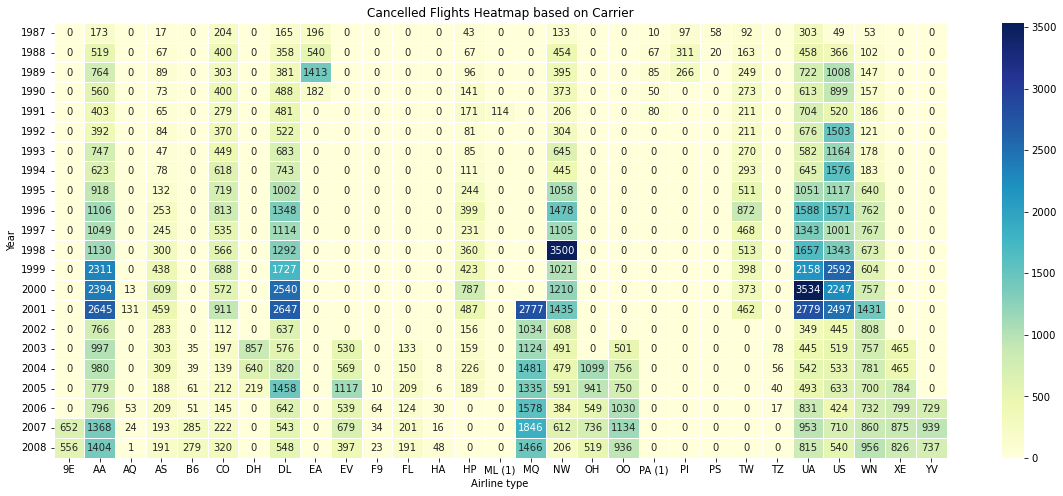

In [95]:
cancelled_flights_count4 = df.groupby(['Year', 'UniqueCarrier']).size().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(cancelled_flights_count4, cmap='YlGnBu', annot=True, fmt='g', linewidths=1.0)
plt.title('Cancelled Flights Heatmap based on Carrier')
plt.xlabel('Airline type')
plt.ylabel('Year')
plt.show()

# 3. Exploring the number of Cancelled Flights across Departure (Origin) States

We will be exploring:
<br>1. Number of cancelled flights across the years (line graph, heat map)
<br>2. Number of cancelled flights across 2001 (line graph, heat map)

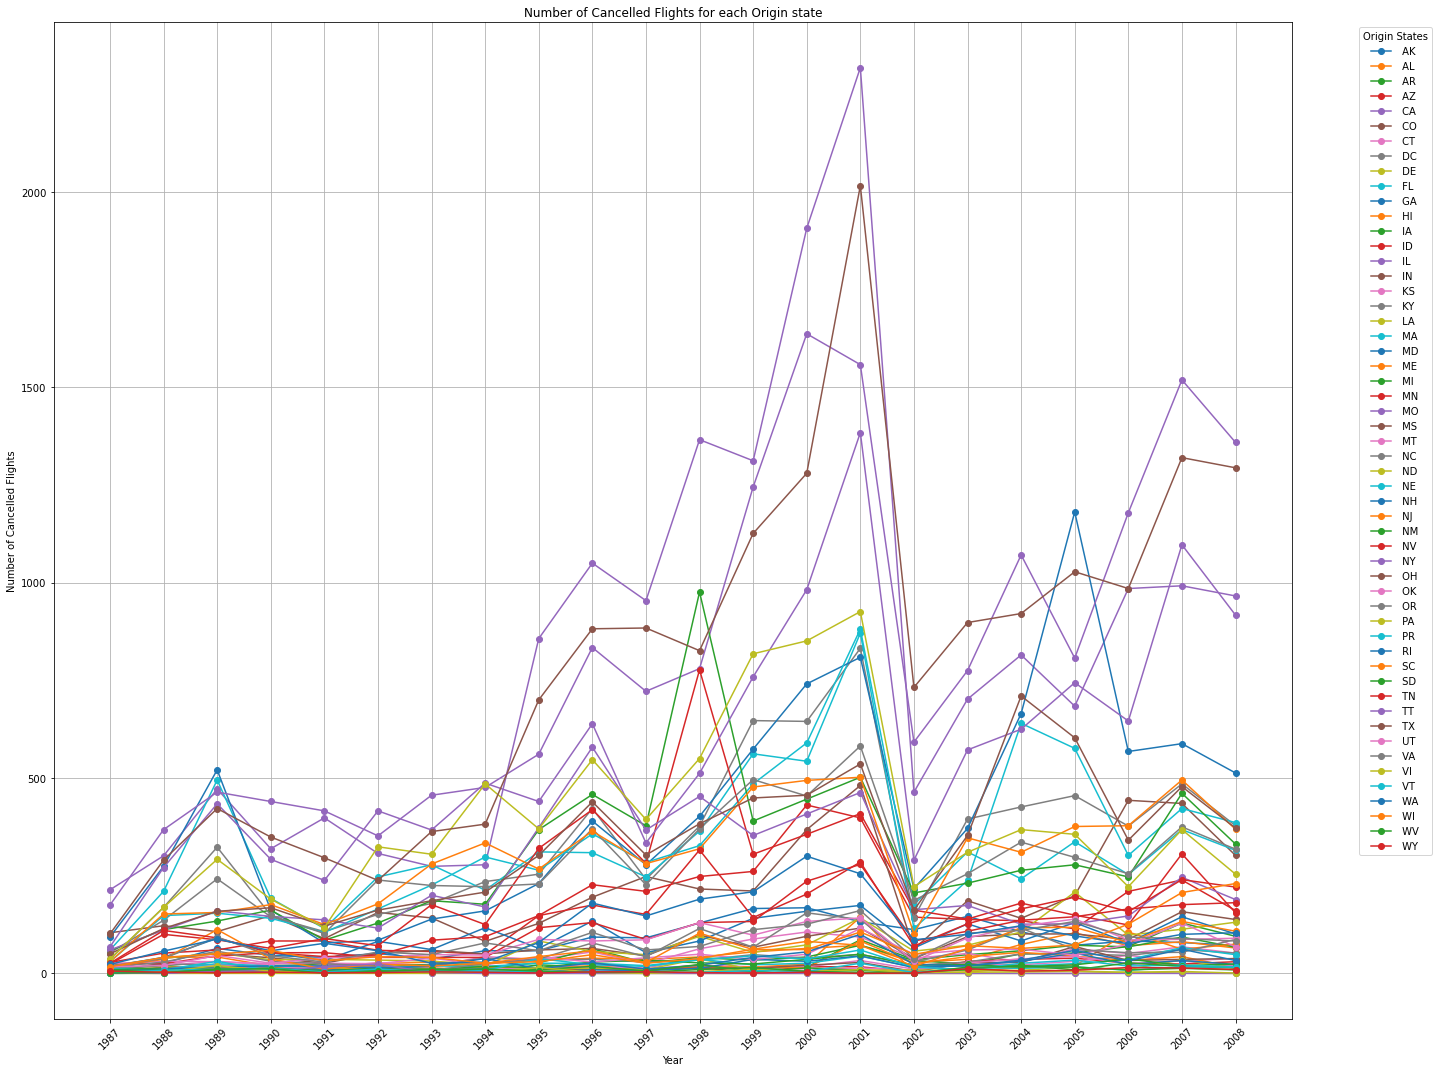

In [112]:
cancelled_flights_count = df.groupby(['Year', 'OriginState']).size().unstack(fill_value=0)

cancelled_flights_count.plot(kind='line', marker='o', figsize=(20, 15))
plt.title('Number of Cancelled Flights for each Origin state')
plt.xlabel('Year')
plt.ylabel('Number of Cancelled Flights')
plt.xticks(ticks=unique_years, labels=df['Year'].unique(), rotation=45) 
plt.legend(title='Origin States', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

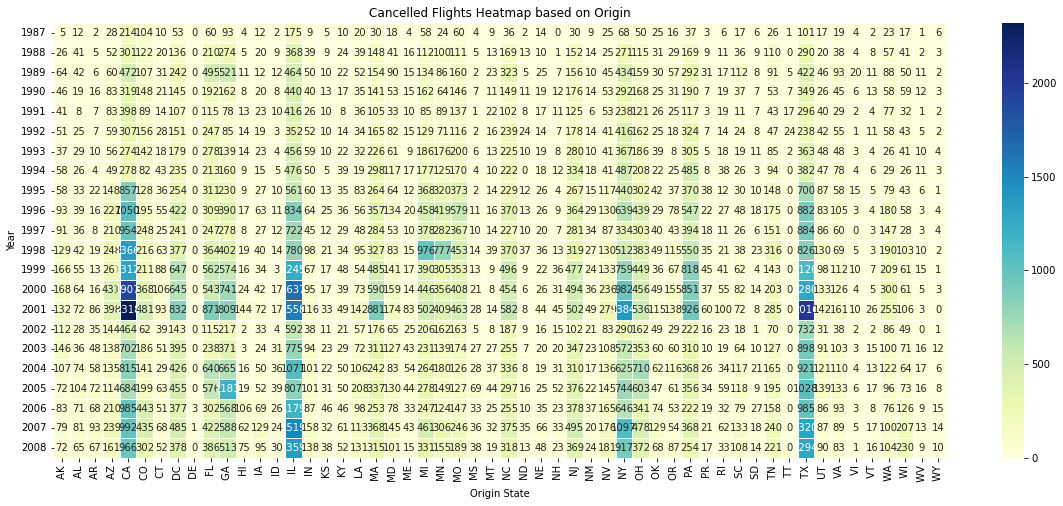

In [80]:
cancelled_flights_count2 = df.groupby(['Year', 'OriginState']).size().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(cancelled_flights_count2, cmap='YlGnBu', annot=True, fmt='g', linewidths=1.0)
plt.title('Cancelled Flights Heatmap based on each Origin state')
plt.xlabel('Origin State')
plt.ylabel('Year')
plt.show()

# 4. Exploring the number of Cancelled Flights across Arrival (Destination) States

We will be exploring:
<br>1. Number of cancelled flights across the years (line graph, heat map)
<br>2. Number of cancelled flights across 2001 (line graph, heat map)

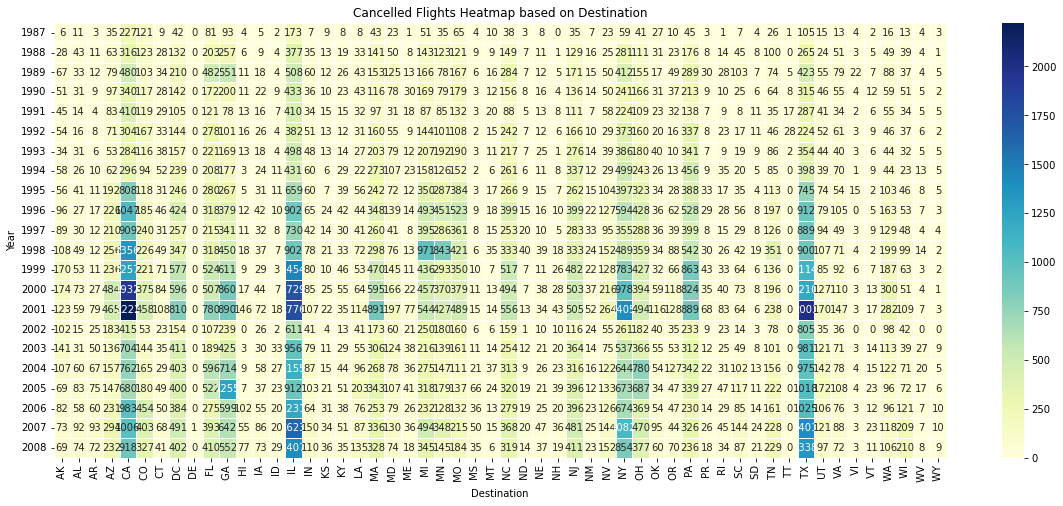

In [81]:
cancelled_flights_count3 = df.groupby(['Year', 'DestState']).size().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(cancelled_flights_count3, cmap='YlGnBu', annot=True, fmt='g', linewidths=1.0)
plt.title('Cancelled Flights Heatmap based on Destination state')
plt.xlabel('Destination')
plt.ylabel('Year')
plt.show()

In [68]:
cancelled_flights_count3.max()

DestState
 AK     174
 AL      92
 AR      93
 AZ     484
 CA    2222
 CO     458
 CT     108
 DC     810
 DE       1
 FL     780
 GA    1255
 HI     146
 IA      86
 ID      33
 IL    1776
 IN     150
 KS      36
 KY      55
 LA     203
 MA     891
 MD     197
 ME      77
 MI     971
 MN     843
 MO     523
 MS      66
 MT      37
 NC     556
 ND      40
 NE      47
 NH      43
 NJ     505
 NM      52
 NV     264
 NY    1405
 OH     780
 OK     116
 OR     128
 PA     889
 PR      68
 RI      83
 SC     144
 SD      24
 TN     351
 TT      28
 TX    2003
 UT     172
 VA     147
 VI      22
 VT      23
 WA     300
 WI     210
 WV      27
 WY      10
dtype: int64

In [100]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')

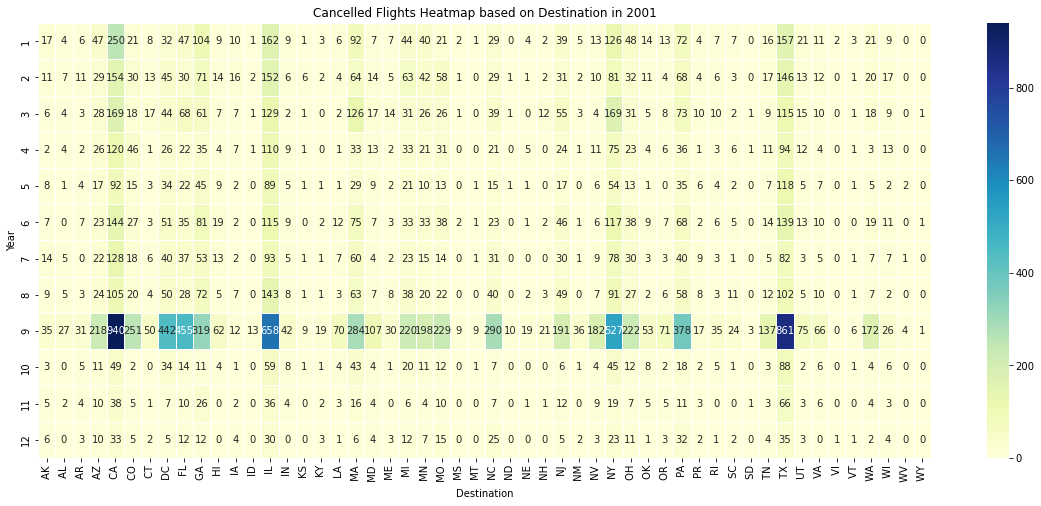

In [105]:
cancelled_in_2001 = df[df['Year'] == 2001]
cancelled_in_2001 = cancelled_in_2001.groupby([df['Date'].dt.month, df['DestState']]).size().unstack(fill_value=0)
# cancelled_in_2001


plt.figure(figsize=(20, 8))
sns.heatmap(cancelled_in_2001, cmap='YlGnBu', annot=True, fmt='g', linewidths=1.0)
plt.title('Cancelled Flights Heatmap based on Destination in 2001')
plt.xlabel('Destination')
plt.ylabel('Year')
plt.show()

<Figure size 1440x576 with 0 Axes>

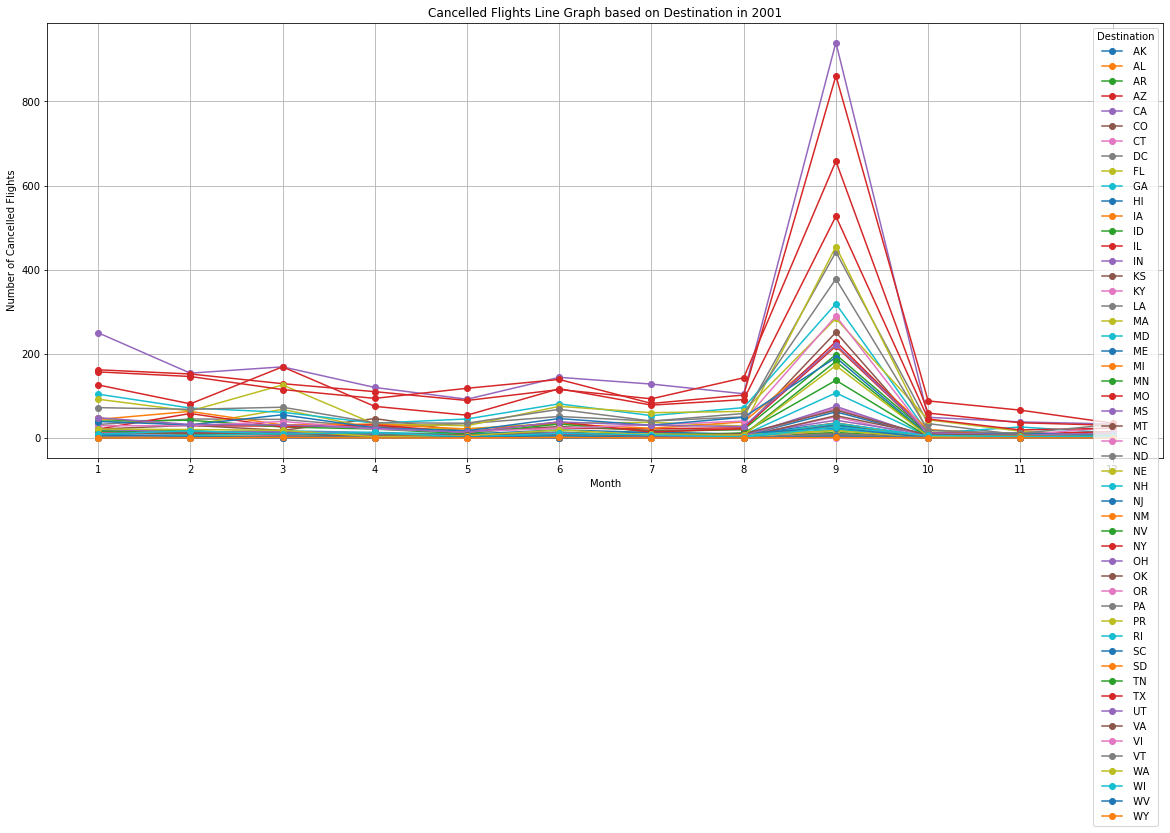

In [111]:
# Plotting the line graph
plt.figure(figsize=(20, 8))
cancelled_in_2001.plot(kind='line', marker='o', figsize=(20, 8))
plt.title('Cancelled Flights Line Graph based on Destination in 2001')
plt.xlabel('Month')
plt.ylabel('Number of Cancelled Flights')
plt.xticks(range(1, 13))  # Set x-axis ticks to represent months (1 to 12)
plt.grid(True)
plt.legend(title='Destination', loc='upper right')
plt.show()

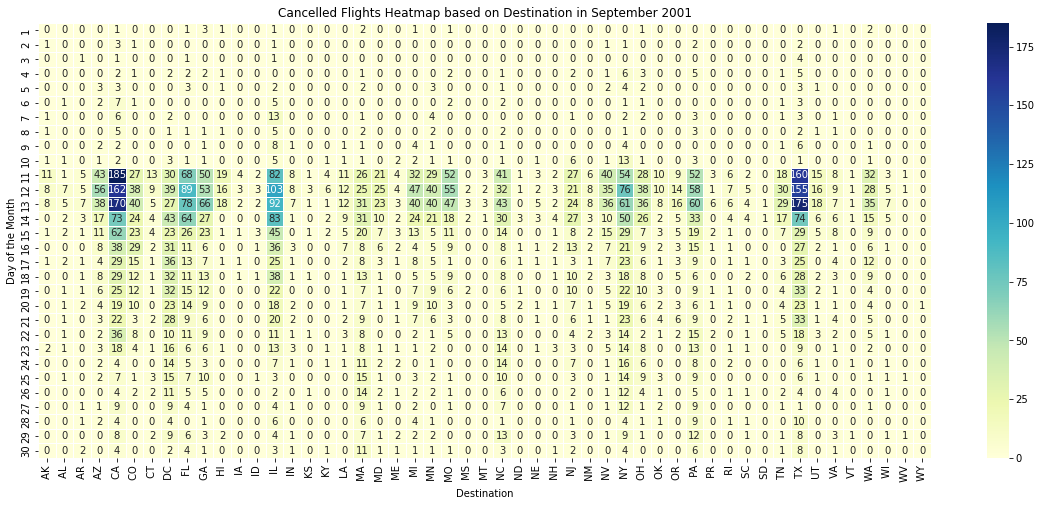

In [109]:
cancelled_in_sept_2001 = df[(df['Year'] == 2001) & (df['Date'].dt.month == 9)]

# Group by day of the month and destination state, then count the occurrences
cancelled_in_sept_2001_by_day = cancelled_in_sept_2001.groupby([cancelled_in_sept_2001['Date'].dt.day, cancelled_in_sept_2001['DestState']]).size().unstack(fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(cancelled_in_sept_2001_by_day, cmap='YlGnBu', annot=True, fmt='g', linewidths=1.0)
plt.title('Cancelled Flights Heatmap based on Destination in September 2001')
plt.xlabel('Destination')
plt.ylabel('Day of the Month')
plt.show()

In [11]:
start_year = 1996
end_year = 2001

# Filter rows for the specified time period
before_terrorism = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]
before_terrorism

,ActualElapsedTime,AirTime,ArrDelay,ArrTime,CRSArrTime,CRSDepTime,CRSElapsedTime,CancellationCode,Cancelled,CarrierDelay,...,NASDelay,Origin,SecurityDelay,TailNum,TaxiIn,TaxiOut,UniqueCarrier,WeatherDelay,Year,Date
40853,NaN,NaN,NaN,NaN,1140,843,117.0,NaN,1,NaN,...,NaN,MEM,NaN,N203US,0.0,0.0,NW,NaN,1996,1996-01-01
40854,NaN,NaN,NaN,NaN,1657,1628,29.0,NaN,1,NaN,...,NaN,WRG,NaN,UNKNOW,0.0,0.0,AS,NaN,1996,1996-01-01
40855,NaN,NaN,NaN,NaN,1410,1315,55.0,NaN,1,NaN,...,NaN,MAF,NaN,UNKNOW,0.0,0.0,WN,NaN,1996,1996-01-01
40856,NaN,NaN,NaN,NaN,1432,1440,52.0,NaN,1,NaN,...,NaN,GRR,NaN,N9075U,0.0,0.0,UA,NaN,1996,1996-01-01
40857,NaN,NaN,NaN,NaN,1845,1720,85.0,NaN,1,NaN,...,NaN,DTW,NaN,N8920E,0.0,0.0,NW,NaN,1996,1996-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116287,NaN,NaN,NaN,NaN,1909,1718,111.0,NaN,1,NaN,...,NaN,DUT,NaN,äNKNOæ,0.0,0.0,AS,NaN,2001,2001-12-30
116288,NaN,NaN,NaN,NaN,906,700,66.0,NaN,1,NaN,...,NaN,LAS,NaN,N636Aæ,0.0,0.0,HP,NaN,2001,2001-12-30
116289,NaN,NaN,NaN,NaN,1910,1548,142.0,NaN,1,NaN,...,NaN,STL,NaN,äNKNOæ,0.0,0.0,US,NaN,2001,2001-12-31
116290,NaN,NaN,NaN,NaN,1029,845,164.0,NaN,1,NaN,...,NaN,ORD,NaN,äNKNOæ,0.0,0.0,AA,NaN,2001,2001-12-31


In [15]:
start_year = 2001
end_year = 2006

# Filter rows for the specified time period
after_terrorism = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]
after_terrorism

,ActualElapsedTime,CRSArrTime,CRSDepTime,CRSElapsedTime,CancellationCode,Cancelled,CarrierDelay,Dest,Distance,Diverted,FlightNum,LateAircraftDelay,NASDelay,Origin,SecurityDelay,TailNum,UniqueCarrier,WeatherDelay,Year,Date
97631,NaN,1110,945,85.0,NaN,1,NaN,CLT,366.0,0,338,NaN,NaN,PIT,NaN,äNKNOæ,US,NaN,2001,2001-01-01
97632,NaN,1953,1814,99.0,NaN,1,NaN,DFW,309.0,0,3630,NaN,NaN,MAF,NaN,äNKNOæ,MQ,NaN,2001,2001-01-01
97633,NaN,1254,1119,95.0,NaN,1,NaN,SLC,507.0,0,2457,NaN,NaN,PHX,NaN,N335Aæ,HP,NaN,2001,2001-01-01
97634,NaN,1534,1424,70.0,NaN,1,NaN,MAF,309.0,0,3555,NaN,NaN,DFW,NaN,äNKNOæ,MQ,NaN,2001,2001-01-01
97635,NaN,1220,1105,75.0,NaN,1,NaN,TUL,237.0,0,3821,NaN,NaN,DFW,NaN,äNKNOæ,MQ,NaN,2001,2001-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160165,NaN,1035,905,90.0,A,1,0.0,IAD,388.0,0,4956,0.0,0.0,CVG,0.0,0,OH,0.0,2006,2006-12-31
160166,NaN,1245,1105,100.0,A,1,0.0,CVG,388.0,0,4945,0.0,0.0,IAD,0.0,0,OH,0.0,2006,2006-12-31
160167,NaN,2140,1935,125.0,A,1,0.0,PVD,722.0,0,5140,0.0,0.0,CVG,0.0,N379CA,OH,0.0,2006,2006-12-31
160168,NaN,1840,1700,100.0,B,1,0.0,CVG,335.0,0,5086,0.0,0.0,CLT,0.0,0,OH,0.0,2006,2006-12-31


In [16]:
flights_by_carrier_year = after_terrorism.groupby(['Year', 'UniqueCarrier']).size().unstack(fill_value=0)
flights_by_carrier_year

UniqueCarrier,AA,AQ,AS,B6,CO,DH,DL,EV,F9,FL,...,NW,OH,OO,TW,TZ,UA,US,WN,XE,YV
Year,,,,,,,,,,,,,,,,,,,,,
2001,2645,131,459,0,911,0,2647,0,0,0,...,1435,0,0,462,0,2779,2497,1431,0,0
2002,766,0,283,0,112,0,637,0,0,0,...,608,0,0,0,0,349,445,808,0,0
2003,997,0,303,35,197,857,576,530,0,133,...,491,0,501,0,78,445,519,757,465,0
2004,980,0,309,39,139,640,820,569,0,150,...,479,1099,756,0,56,542,533,781,465,0
2005,779,0,188,61,212,219,1458,1117,10,209,...,591,941,750,0,40,493,633,700,784,0
2006,796,53,209,51,145,0,642,539,64,124,...,384,549,1030,0,17,831,424,732,799,729


In [17]:
flights_by_carrier_year_before = before_terrorism.groupby(['Year', 'UniqueCarrier']).size().unstack(fill_value=0)
flights_by_carrier_year_before

UniqueCarrier,AA,AQ,AS,CO,DL,HP,MQ,NW,TW,UA,US,WN
Year,,,,,,,,,,,,
1996,1106,0,253,813,1348,399,0,1478,872,1588,1571,762
1997,1049,0,245,535,1114,231,0,1105,468,1343,1001,767
1998,1130,0,300,566,1292,360,0,3500,513,1657,1343,673
1999,2311,0,438,688,1727,423,0,1021,398,2158,2592,604
2000,2394,13,609,572,2540,787,0,1210,373,3534,2247,757
2001,2645,131,459,911,2647,487,2777,1435,462,2779,2497,1431


In [22]:
flights_by_carrier_year_before['TotalFlightsPerYear'] = flights_by_carrier_year_before.sum(axis=1)
flights_by_carrier_year_before

UniqueCarrier,AA,AQ,AS,CO,DL,HP,MQ,NW,TW,UA,US,WN,TotalDelaysPerYear
Year,,,,,,,,,,,,,
1996,51470,0,11293,32428,69554,15921,0,42049,21602,56979,56795,60063,418154
1997,52027,0,11483,32029,72458,16457,0,41812,21645,57934,56148,62949,424942
1998,51038,0,11940,31498,71972,15846,0,38833,21443,58516,54332,64205,419623
1999,52766,0,12165,31066,70893,16415,0,42242,21410,59533,54633,67898,429021
2000,57091,900,11764,30718,70195,16748,0,42810,21018,58561,57805,72607,440217
2001,54311,4135,12014,29364,64424,16136,36173,41260,19049,53663,52766,74966,458261
